### 작업자별 BENDING, FORCE 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
import sweetviz as sv
from statsmodels.formula.api import ols
import datetime as dt 

import warnings
warnings.filterwarnings("ignore")

In [4]:
cm3 = pd.read_excel("d:/novelis/ds2023/CM3_분석연습.xls")
cm3.head(3)

,구분,회수율,시작일시,종료일시,준비시간,작업시간,소요시간(UPTIME),Batch No,YS_TARGET_온도,Make as Alloy,...,GAUGE 3SIGMA,FLATNESS 3SIGMA,ENTRY WEIGHT,2STD 평균속도,2STD 최대속도,2STD BENDING,2STD ROLL FORCE,입측 COIL온도,평균 출측 온도,COIL TEMP DIFF
0,NaN,97.21,2023-01-01 06:27:25,2023-01-01 06:37:00,2.83,6.75,9.58,S843331,165.0,M3104,...,0.82,2.76,11881.0,1109.0,1392.0,14.3,489.0,58.0,142.53360,-22.46640
1,NaN,97.30,2023-01-01 06:37:00,2023-01-01 06:46:01,2.73,6.28,9.01,S843341,165.0,M3104,...,0.78,3.12,11876.0,1180.0,1518.0,16.7,485.0,58.0,142.68825,-22.31175
2,NaN,97.47,2023-01-01 06:46:00,2023-01-01 06:56:10,2.87,7.28,10.15,S841842,170.0,K3104,...,0.77,3.37,12312.0,1242.0,1569.0,38.9,442.0,62.0,142.10706,-27.89294


In [5]:
cm3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30931 entries, 0 to 30930
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   구분               5406 non-null   object        
 1   회수율              25525 non-null  float64       
 2   시작일시             30931 non-null  datetime64[ns]
 3   종료일시             29735 non-null  datetime64[ns]
 4   준비시간             25513 non-null  float64       
 5   작업시간             29735 non-null  float64       
 6   소요시간(UPTIME)     30931 non-null  float64       
 7   Batch No         26721 non-null  object        
 8   YS_TARGET_온도     25525 non-null  float64       
 9   Make as Alloy    26721 non-null  object        
 10  Pass             25709 non-null  object        
 11  ENTRY중량          25525 non-null  float64       
 12  EXIT중량           26721 non-null  float64       
 13  작업자              26721 non-null  object        
 14  폭                26721 non-null  float

In [6]:
cm3.columns

Index(['구분', '회수율', '시작일시', '종료일시', '준비시간', '작업시간', '소요시간(UPTIME)', 'Batch No',
       'YS_TARGET_온도', 'Make as Alloy', 'Pass', 'ENTRY중량', 'EXIT중량', '작업자',
       '폭', '후공정', '입측텐션', '인터텐션', '출측텐션', '판검사', '회수율내역', '일연실적일', 'TR속도',
       'ENTRY GAUGE', 'INTER GAUGE', 'EXIT GAUGE', 'GAUGE 3SIGMA',
       'FLATNESS 3SIGMA', 'ENTRY WEIGHT', '2STD 평균속도', '2STD 최대속도',
       '2STD BENDING', '2STD ROLL FORCE', '입측 COIL온도', '평균 출측 온도',
       'COIL TEMP DIFF'],
      dtype='object')

In [7]:
c1 = cm3[["시작일시", "Batch No", "작업자", "2STD BENDING", "2STD ROLL FORCE", "2STD 최대속도"]]
c1

,시작일시,Batch No,작업자,2STD BENDING,2STD ROLL FORCE,2STD 최대속도
0,2023-01-01 06:27:25,S843331,이하윤,14.3,489.0,1392.0
1,2023-01-01 06:37:00,S843341,이하윤,16.7,485.0,1518.0
2,2023-01-01 06:46:00,S841842,이하윤,38.9,442.0,1569.0
3,2023-01-01 06:56:10,S841912,이하윤,19.5,432.0,1617.0
4,2023-01-01 07:05:21,S841911,이하윤,7.9,432.0,1516.0
...,...,...,...,...,...,...
30926,2023-08-25 08:44:32,NaN,NaN,NaN,NaN,NaN
30927,2023-08-25 08:51:00,NaN,NaN,NaN,NaN,NaN
30928,2023-08-25 13:47:00,NaN,NaN,NaN,NaN,NaN
30929,2023-08-25 13:51:40,S957406,김진상,42.5,601.0,896.0


In [8]:
c1.set_index("시작일시", inplace=True)

In [9]:
c1["MONTH"] = c1.index.month
c1.head()

,Batch No,작업자,2STD BENDING,2STD ROLL FORCE,2STD 최대속도,MONTH
시작일시,,,,,,
2023-01-01 06:27:25,S843331,이하윤,14.3,489.0,1392.0,1
2023-01-01 06:37:00,S843341,이하윤,16.7,485.0,1518.0,1
2023-01-01 06:46:00,S841842,이하윤,38.9,442.0,1569.0,1
2023-01-01 06:56:10,S841912,이하윤,19.5,432.0,1617.0,1
2023-01-01 07:05:21,S841911,이하윤,7.9,432.0,1516.0,1


In [12]:
# 특정 월(8월)에서 데이터 추출 
c1[c1["MONTH"]==8]["2STD BENDING"].value_counts().sort_index()

2STD BENDING
-25.4    1
-23.0    1
-22.8    2
-22.7    1
-22.0    1
        ..
 51.8    1
 52.5    1
 53.0    1
 54.2    1
 55.1    1
Name: count, Length: 602, dtype: int64

In [18]:
c1["max speed"] = pd.cut(c1["2STD 최대속도"],
                         bins = [0, 1200, 1500, 1800],
                         right = False,
                         labels = ["Low", "Normal", "High"])
c1.head()

,Batch No,작업자,2STD BENDING,2STD ROLL FORCE,2STD 최대속도,MONTH,max speed
시작일시,,,,,,,
2023-01-01 06:27:25,S843331,이하윤,14.3,489.0,1392.0,1,Normal
2023-01-01 06:37:00,S843341,이하윤,16.7,485.0,1518.0,1,High
2023-01-01 06:46:00,S841842,이하윤,38.9,442.0,1569.0,1,High
2023-01-01 06:56:10,S841912,이하윤,19.5,432.0,1617.0,1,High
2023-01-01 07:05:21,S841911,이하윤,7.9,432.0,1516.0,1,High


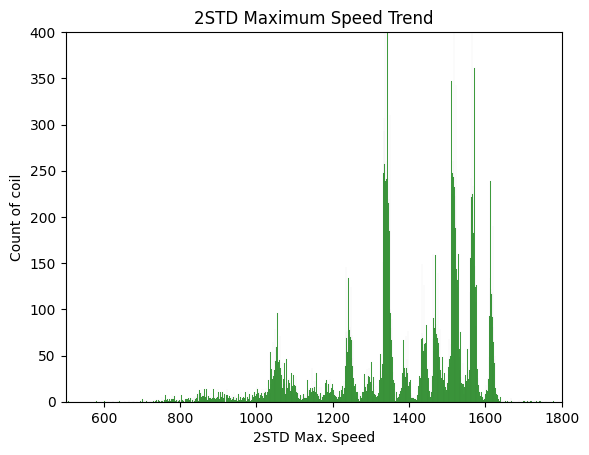

In [19]:
sns.histplot(data = c1, 
            x = "2STD 최대속도",
            bins = [0, 1200, 1500, 1800],    # 구간의 정보
            binwidth = 1.2,
            color = "g")
plt.title("2STD Maximum Speed Trend") 
plt.xlabel("2STD Max. Speed")
plt.ylabel("Count of coil")

plt.xlim((500, 1800))
plt.ylim((0, 400))
plt.savefig("CM3 2STD Maximum speed trend")
plt.show()

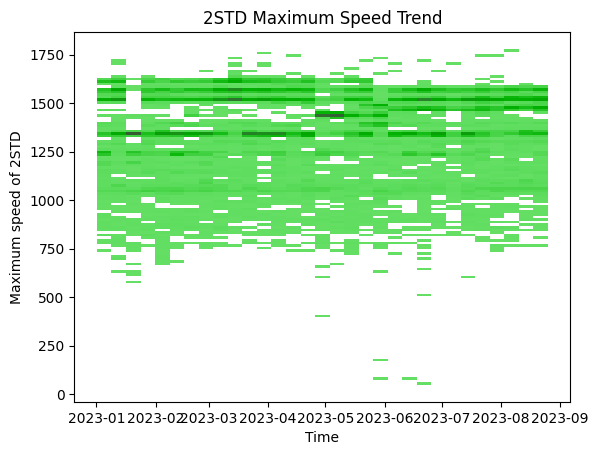

In [15]:
# 에러 
# x를 시간으로 y를 속도 값으로 추출하는 그래프 

sns.histplot(data = c1,
             x = c1.index, 
            y = "2STD 최대속도",
            # bins = [0, 1200, 1500, 1800],    # 구간의 정보
            # binwidth = 1.2,
            color = "g")
plt.title("2STD Maximum Speed Trend") 
plt.xlabel("Time")
plt.ylabel("Maximum speed of 2STD")

# plt.xlim((500, 1800))
# plt.ylim((0, 400))
plt.savefig("CM3 2STD Maximum speed trend")
plt.show()

<Axes: xlabel='시작일시'>

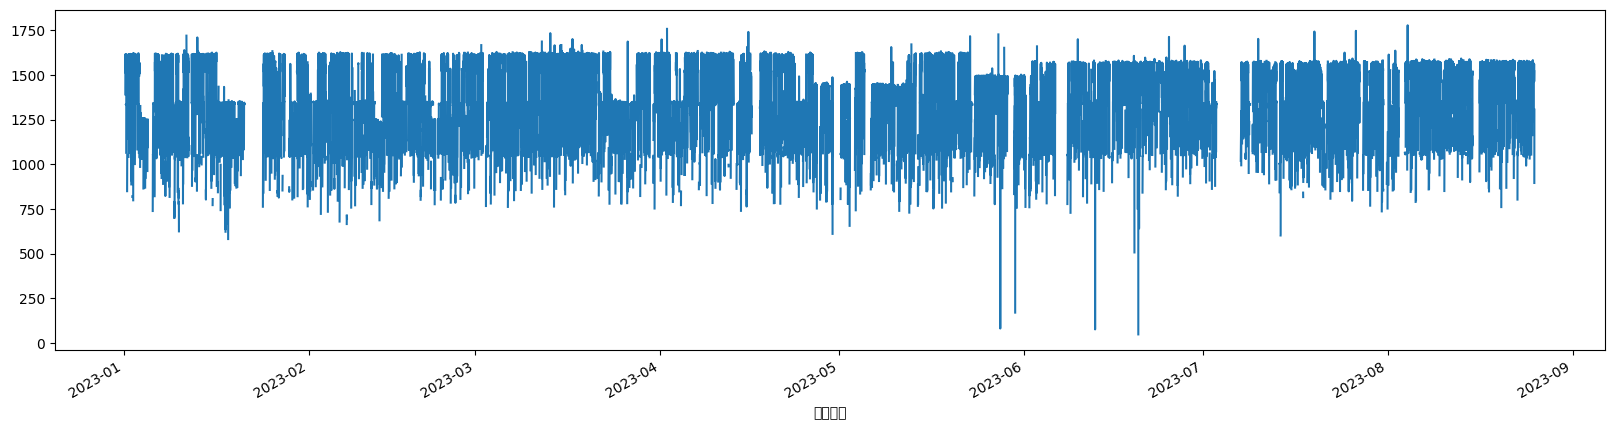

In [16]:
c1['2STD 최대속도'].plot(figsize=(20,5))

<Axes: xlabel='시작일시'>

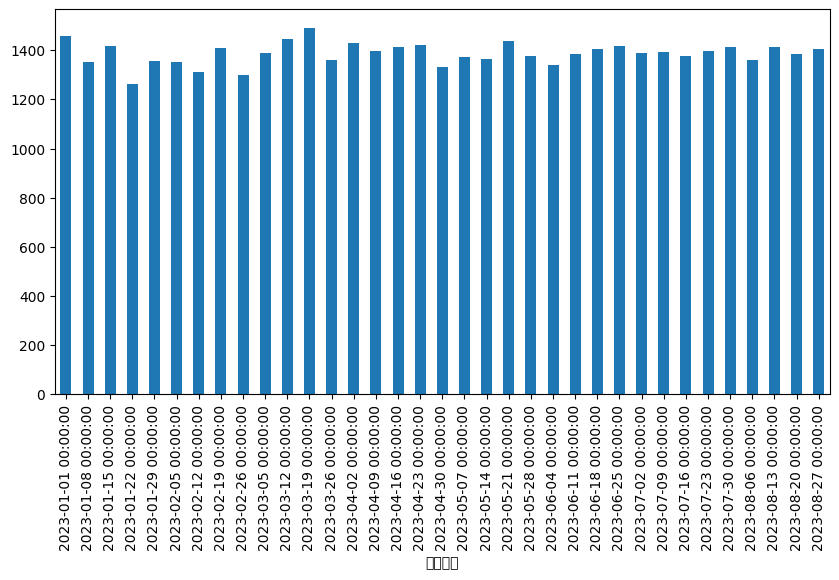

In [21]:
c1.resample('W')['2STD 최대속도'].mean().plot(kind = 'bar', figsize=(10,5))

<Axes: xlabel='시작일시'>

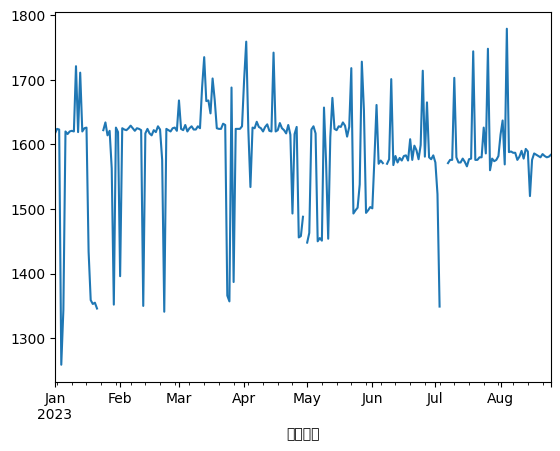

In [18]:
c1.resample('D')['2STD 최대속도'].max().plot()

<Axes: xlabel='시작일시'>

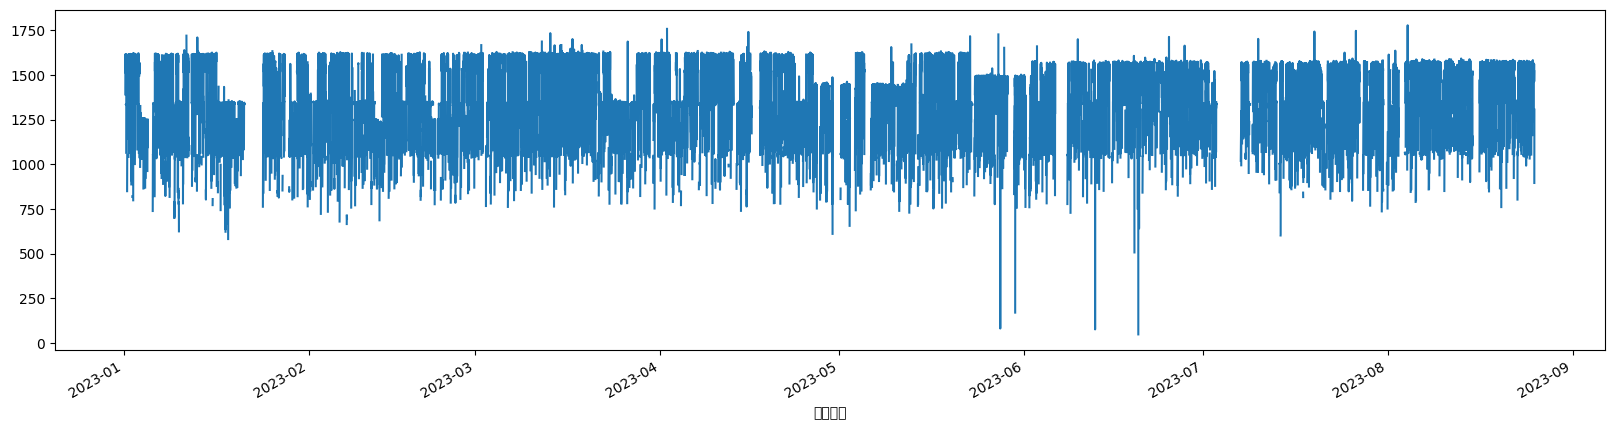

In [22]:
c1['2STD 최대속도'].plot(figsize=(20,5))

In [ ]:
rk1_fume2.index = [d.strftime('%Y-%m-%d') for d in rk1_fume2.index]  # 부장님 참조 코드